<h1>TASK 2. ANALYSIS OF MULTIVARIATE RANDOM VARIABLES</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Plotting a Non Parametric Estimation of PDF in Form of a Histogram and Using Kernel density function for MRV</a></li>
    <li><a href='#002'>Estimation of Multivariate Mathematical Expectation and Variance</a></li>
    <li><a href='#003'>Non Parametric Estimation of Conditional Distributions, Mathematical Expectations and Variances</a></li>
    <li><a href='#004'>Estimation of Pair Correlation Coefficients, Confidence Intervals for Them and Significance Levels</a></li>
    <li><a href='#005'>Task Formulation for Regression, Multivariate Correlation</a></li>
    <li><a href='#006'>Regression Model, Multicollinearity and Regularization</a></li>
    <li><a href='#007'>Quality Analysis</a></li>
    </ol>
</ul>

<h2>0. Environment Setup</h2>

<a href='#000'>Back</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
warnings.filterwarnings(action='ignore')

<a name='001'></a>

<h2>1. Plotting a Non Parametric Estimation of PDF in Form of a Histogram and Using Kernel density function for MRV</h2>

<a href='#000'>Back</a>

Dataset name: Heart Disease Data Set

Dataset source: https://www.kaggle.com/ronitf/heart-disease-uci/version/1

Dataset content:
- age of patient
- sex of patient
- chest pain type
- resting blood pressure
- serum cholestoral
- fasting blood sugar
- resting electrocardiographic results
- maximum heart rate achieved
- exercise induced angina
- ST depression induced by exercise relative to rest
- slope of the peak exercise ST segment
- number of major vessels colored by flourosopy
- thal

In [3]:
df = pd.read_csv('data/data.csv')

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'ca', 'target']]
df.head(10)

,age,sex,cp,trestbps,chol,thalach,ca,target
0,63,1,3,145,233,150,0,1
1,37,1,2,130,250,187,0,1
2,41,0,1,130,204,172,0,1
3,56,1,1,120,236,178,0,1
4,57,0,0,120,354,163,0,1
5,57,1,0,140,192,148,0,1
6,56,0,1,140,294,153,0,1
7,44,1,1,120,263,173,0,1
8,52,1,2,172,199,162,0,1
9,57,1,2,150,168,174,0,1


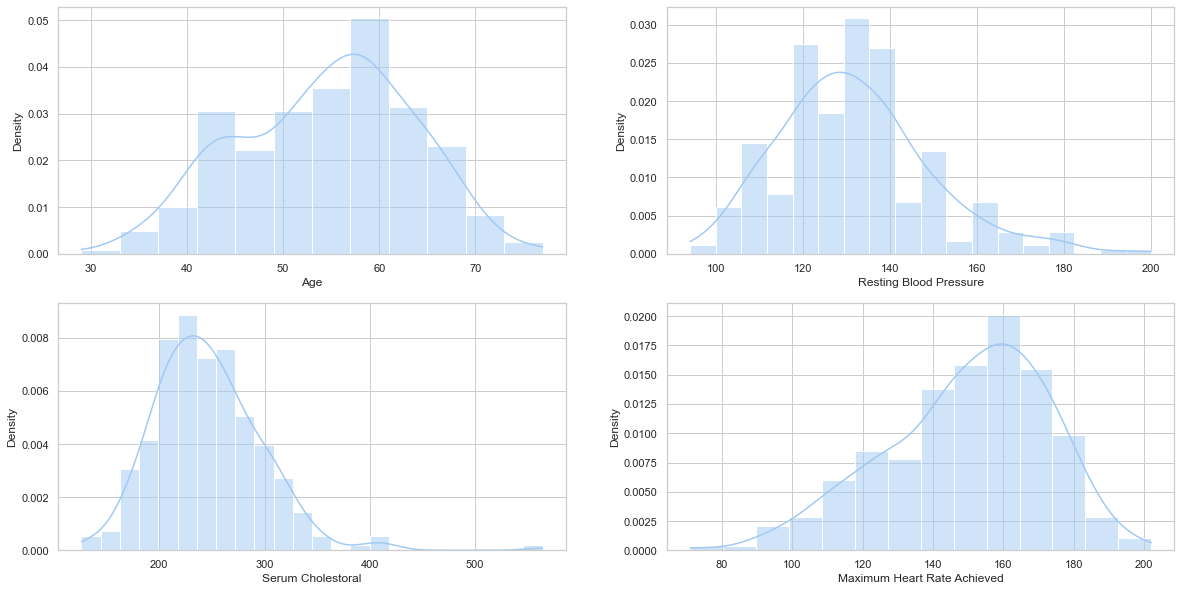

In [8]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set_theme(style='whitegrid', palette='pastel')

age = sns.histplot(df.age, ax=ax[0, 0], kde=True, stat='density')
age.set(xlabel='Age')

trestbps = sns.histplot(df.trestbps, ax=ax[0, 1], kde=True, stat='density')
trestbps.set(xlabel='Resting Blood Pressure')

chol = sns.histplot(df.chol, ax=ax[1, 0], kde=True, stat='density')
chol.set(xlabel='Serum Cholestoral')

thalach = sns.histplot(df.thalach, ax=ax[1, 1], kde=True, stat='density')
thalach.set(xlabel='Maximum Heart Rate Achieved')

plt.show()

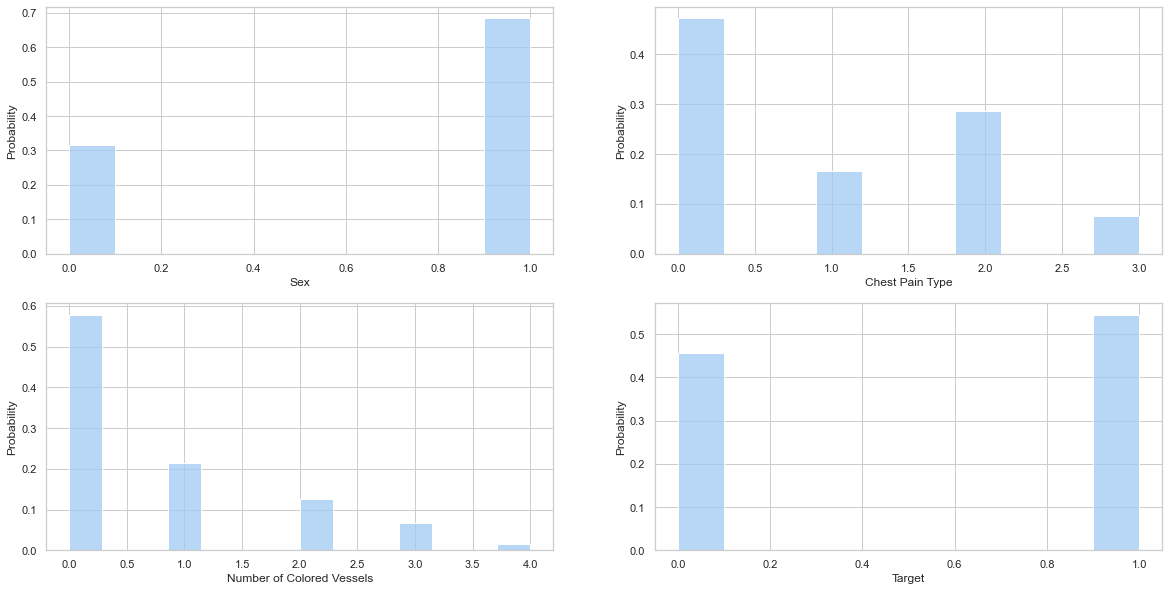

In [9]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set_theme(style='whitegrid', palette='pastel')

sex = sns.histplot(df.sex, ax=ax[0, 0], kde=False, stat='probability')
sex.set(xlabel='Sex')

cp = sns.histplot(df.cp, ax=ax[0, 1], kde=False, stat='probability')
cp.set(xlabel='Chest Pain Type')

ca = sns.histplot(df.ca, ax=ax[1, 0], kde=False, stat='probability')
ca.set(xlabel='Number of Colored Vessels')

target = sns.histplot(df.target, ax=ax[1, 1], kde=False, stat='probability')
target.set(xlabel='Target')

plt.show()

<a name='002'></a>

<h2>2. Estimation of Multivariate Mathematical Expectation and Variance</h2>

<a href='#000'>Back</a>

In [9]:
df.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
thalach     149.646865
ca            0.729373
target        0.544554
dtype: float64

In [10]:
df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
thalach      524.646406
ca             1.045724
target         0.248836
dtype: float64

<a name='003'></a>

<h2>3. Non Parametric Estimation of Conditional Distributions, Mathematical Expectations and Variances</h2>

<a href='#000'>Back</a>

In [11]:
df_conditional = df[df.target == 1]
df_conditional.head(10)

,age,sex,cp,trestbps,chol,thalach,ca,target
0,63,1,3,145,233,150,0,1
1,37,1,2,130,250,187,0,1
2,41,0,1,130,204,172,0,1
3,56,1,1,120,236,178,0,1
4,57,0,0,120,354,163,0,1
5,57,1,0,140,192,148,0,1
6,56,0,1,140,294,153,0,1
7,44,1,1,120,263,173,0,1
8,52,1,2,172,199,162,0,1
9,57,1,2,150,168,174,0,1


In [12]:
df_conditional.mean()

age          52.496970
sex           0.563636
cp            1.375758
trestbps    129.303030
chol        242.230303
thalach     158.466667
ca            0.363636
target        1.000000
dtype: float64

In [13]:
df_conditional.var()

age           91.214930
sex            0.247450
cp             0.906726
trestbps     261.456393
chol        2867.910052
thalach      367.652846
ca             0.720621
target         0.000000
dtype: float64

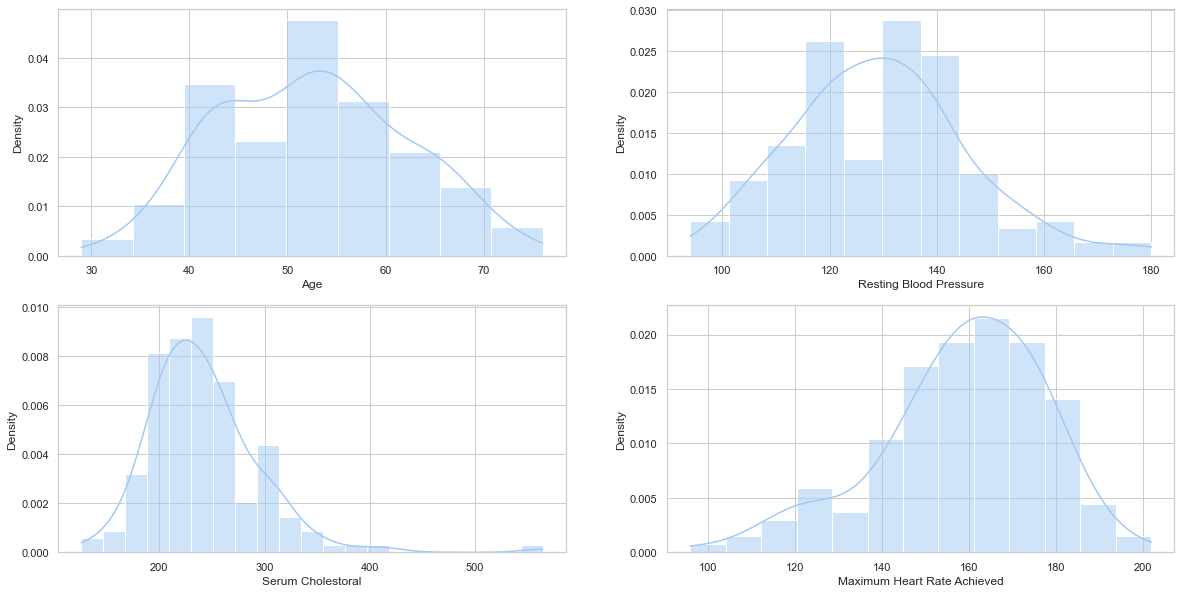

In [14]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set_theme(style='whitegrid', palette='pastel')

age = sns.histplot(df_conditional.age, ax=ax[0, 0], kde=True, stat='density')
age.set(xlabel='Age')

trestbps = sns.histplot(df_conditional.trestbps, ax=ax[0, 1], kde=True, stat='density')
trestbps.set(xlabel='Resting Blood Pressure')

chol = sns.histplot(df_conditional.chol, ax=ax[1, 0], kde=True, stat='density')
chol.set(xlabel='Serum Cholestoral')

thalach = sns.histplot(df_conditional.thalach, ax=ax[1, 1], kde=True, stat='density')
thalach.set(xlabel='Maximum Heart Rate Achieved')

plt.show()

In [15]:
df_conditional = df[df.target == 0]
df_conditional.head(10)

,age,sex,cp,trestbps,chol,thalach,ca,target
165,67,1,0,160,286,108,3,0
166,67,1,0,120,229,129,2,0
167,62,0,0,140,268,160,2,0
168,63,1,0,130,254,147,1,0
169,53,1,0,140,203,155,0,0
170,56,1,2,130,256,142,1,0
171,48,1,1,110,229,168,0,0
172,58,1,1,120,284,160,0,0
173,58,1,2,132,224,173,2,0
174,60,1,0,130,206,132,2,0


In [16]:
df_conditional.mean()

age          56.601449
sex           0.826087
cp            0.478261
trestbps    134.398551
chol        251.086957
thalach     139.101449
ca            1.166667
target        0.000000
dtype: float64

In [17]:
df_conditional.var()

age           63.394742
sex            0.144716
cp             0.820692
trestbps     350.810801
chol        2445.758807
thalach      510.704961
ca             1.088808
target         0.000000
dtype: float64

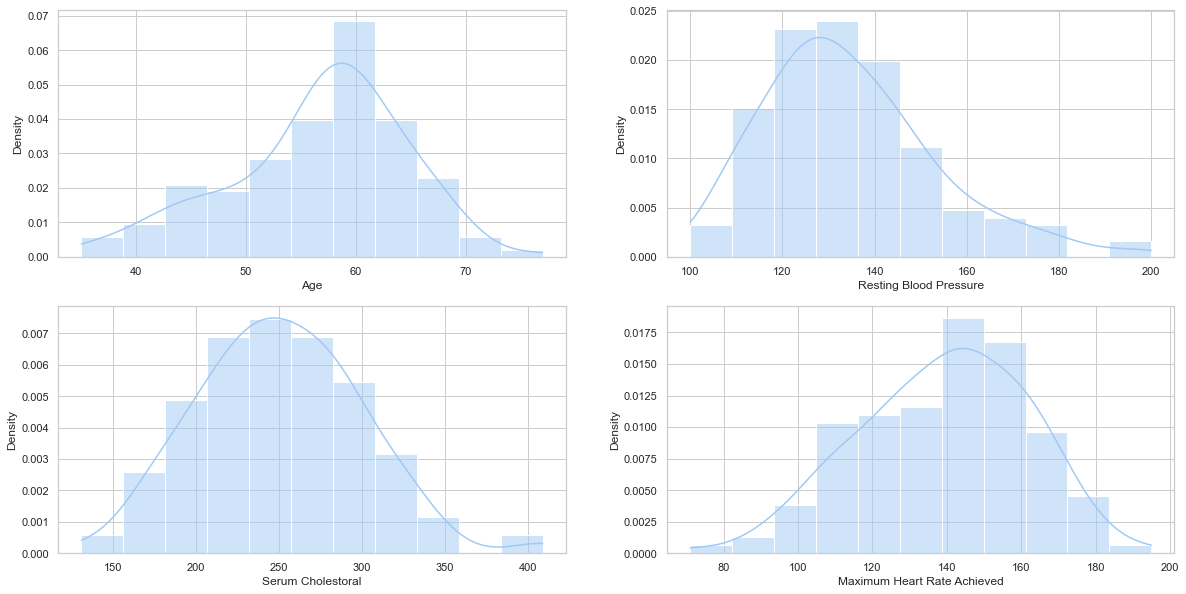

In [18]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set_theme(style='whitegrid', palette='pastel')

age = sns.histplot(df_conditional.age, ax=ax[0, 0], kde=True, stat='density')
age.set(xlabel='Age')

trestbps = sns.histplot(df_conditional.trestbps, ax=ax[0, 1], kde=True, stat='density')
trestbps.set(xlabel='Resting Blood Pressure')

chol = sns.histplot(df_conditional.chol, ax=ax[1, 0], kde=True, stat='density')
chol.set(xlabel='Serum Cholestoral')

thalach = sns.histplot(df_conditional.thalach, ax=ax[1, 1], kde=True, stat='density')
thalach.set(xlabel='Maximum Heart Rate Achieved')

plt.show()

<a name='004'></a>

<h2>4. Estimation of Pair Correlation Coefficients, Confidence Intervals for Them and Significance Levels</h2>

<a href='#000'>Back</a>

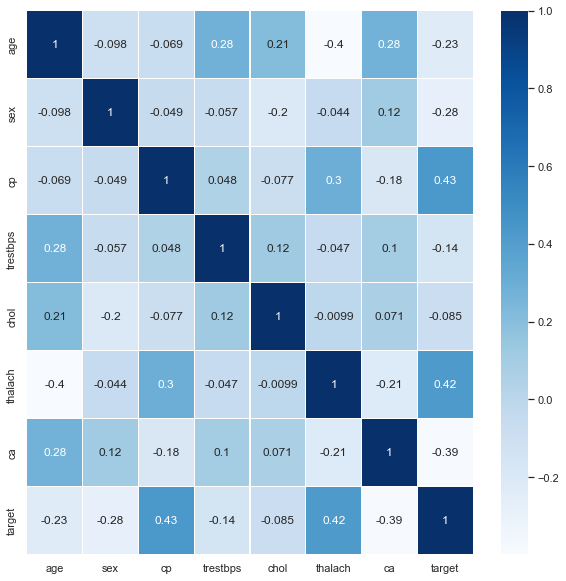

In [19]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

sns.heatmap(df.corr(), cmap='Blues', annot=True, linewidths=0.25)

plt.show()

In [20]:
def return_estimation(array, target, alpha=0.05):
    r, pvalue = scipy.stats.pearsonr(array, target)
    
    r_to_z = np.arctanh(r)
    se = 1 / np.sqrt(array.count() - 3)
    z = scipy.stats.norm.ppf(1 - alpha / 2)
    int_a, int_b = r_to_z - z * se, r_to_z + z * se
    int_a, int_b = np.tanh(int_a), np.tanh(int_b)
    
    print('Confidence Interval: ({:.4f}, {:.4f})'.format(int_a, int_b))
    print('Significance Level: {:.6f}'.format(pvalue))
    print('Correlation Coefficient: {:.4f}'.format(r))

Pair Sex-Serum Cholestoral Estimation.

In [21]:
return_estimation(df.sex, df.chol)

Confidence Interval: (-0.3038, -0.0872)
Significance Level: 0.000530
Correlation Coefficient: -0.1979


Pair Resting Blood Pressure-Serum Cholestoral Estimation.

In [22]:
return_estimation(df.trestbps, df.chol)

Confidence Interval: (0.0106, 0.2326)
Significance Level: 0.032082
Correlation Coefficient: 0.1232


Pair Heart Disease-Serum Cholestoral Estimation.

In [23]:
return_estimation(df.target, df.chol)

Confidence Interval: (-0.1960, 0.0277)
Significance Level: 0.138790
Correlation Coefficient: -0.0852


Pair Maximum Heart Rate Achieved-Serum Cholestoral Estimation.

In [24]:
return_estimation(df.thalach, df.chol)

Confidence Interval: (-0.1225, 0.1029)
Significance Level: 0.863193
Correlation Coefficient: -0.0099


<a name='005'></a>

<h2>5. Task Formulation for Regression, Multivariate Correlation</h2>

<a href='#000'>Back</a>

<h3>Goal</h3>

Training a model for predicting patient serum cholesterol by patient age, sex, chest pain type, resting blood pressure, resting electrocardiographic results, maximum heart rate achieved, occurrence of a heart attack.

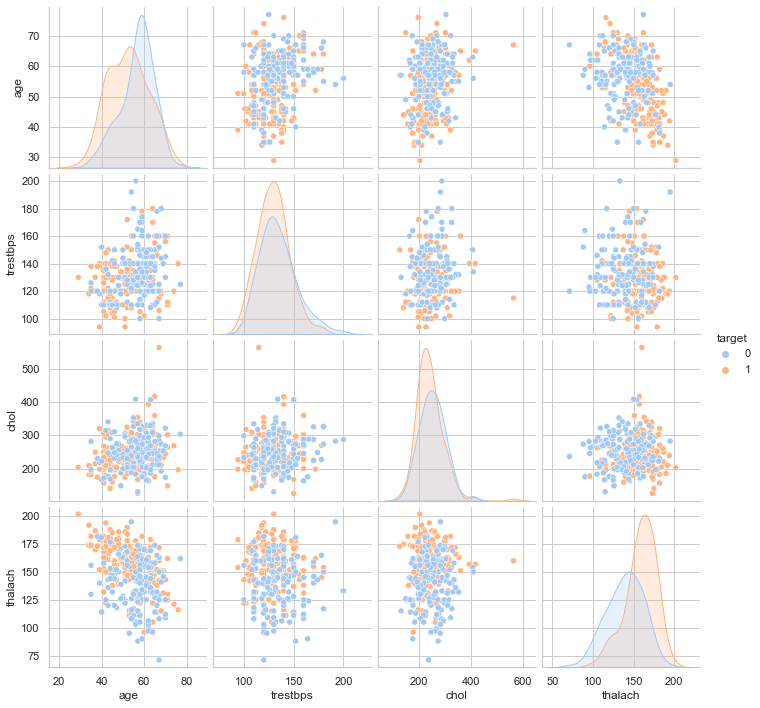

In [25]:
sns.set_theme(style='whitegrid', palette='pastel')

sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', kind='scatter')

plt.show()

<a name='006'></a>

<h2>6. Regression Model, Multicollinearity and Regularization</h2>

<a href='#000'>Back</a>

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    df[['age', 'sex', 'cp', 'trestbps', 'thalach', 'ca', 'target']],
    df['chol']
)

In [11]:
x_train.head(10)

,age,sex,cp,trestbps,thalach,ca,target
173,58,1,2,132,173,2,0
12,49,1,1,130,171,0,1
148,44,1,2,120,169,0,1
26,59,1,2,150,157,0,1
78,52,1,1,128,184,0,1
87,46,1,1,101,156,0,1
245,48,1,0,124,166,0,0
61,54,1,1,108,156,0,1
19,69,0,3,140,151,2,1
146,44,0,2,118,149,1,1


In [12]:
y_train.head(10)

173    224
12     266
148    226
26     212
78     205
87     197
245    274
61     309
19     239
146    242
Name: chol, dtype: int64

Training a PassiveAggressiveRegressor model for predicting patient serum cholesterol.

In [13]:
paregressor = PassiveAggressiveRegressor(n_iter_no_change=10)
paregressor.fit(x_train, y_train)

mae = mean_absolute_error(y_test, paregressor.predict(x_test))
mse = mean_squared_error(y_test, paregressor.predict(x_test))
r2 = r2_score(y_test, paregressor.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))

Mean Absolute Error: 46.291
Mean Squared Error: 3433.152
R2 Score: -0.503


Training a LinearRegression model for predicting patient serum cholesterol.

In [14]:
lregressor = LinearRegression()
lregressor.fit(x_train, y_train)

mae = mean_absolute_error(y_test, lregressor.predict(x_test))
mse = mean_squared_error(y_test, lregressor.predict(x_test))
r2 = r2_score(y_test, lregressor.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))

Mean Absolute Error: 38.581
Mean Squared Error: 2152.451
R2 Score: 0.058


Training a Ridge model for predicting patient serum cholesterol.

In [15]:
ridge = Ridge()
ridge.fit(x_train, y_train)

mae = mean_absolute_error(y_test, ridge.predict(x_test))
mse = mean_squared_error(y_test, ridge.predict(x_test))
r2 = r2_score(y_test, ridge.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))

Mean Absolute Error: 38.556
Mean Squared Error: 2151.276
R2 Score: 0.058


<a name='007'></a>

<h2>7. Quality Analysis</h2>

<a href='#000'>Back</a>

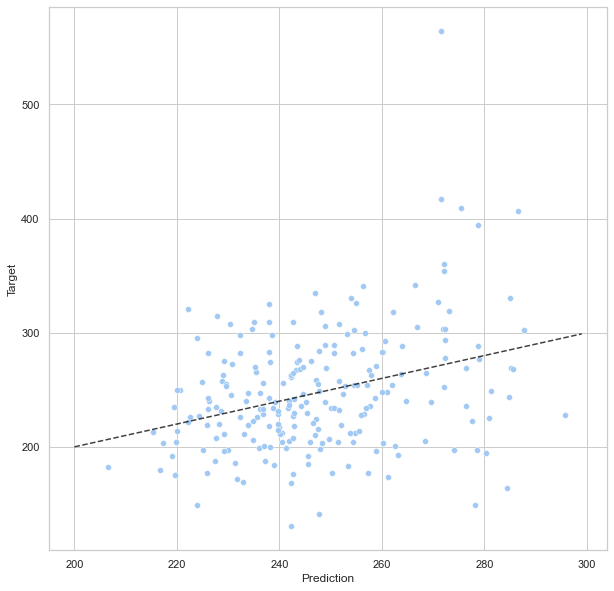

In [20]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

y_logits = np.array(lregressor.predict(x_train))
y_target = np.array(y_train)

sns.scatterplot(y_logits, y_target, ax=ax)
sns.lineplot(range(200, 300), range(200, 300), color='black', linestyle='--', alpha=0.75, ax=ax)

plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

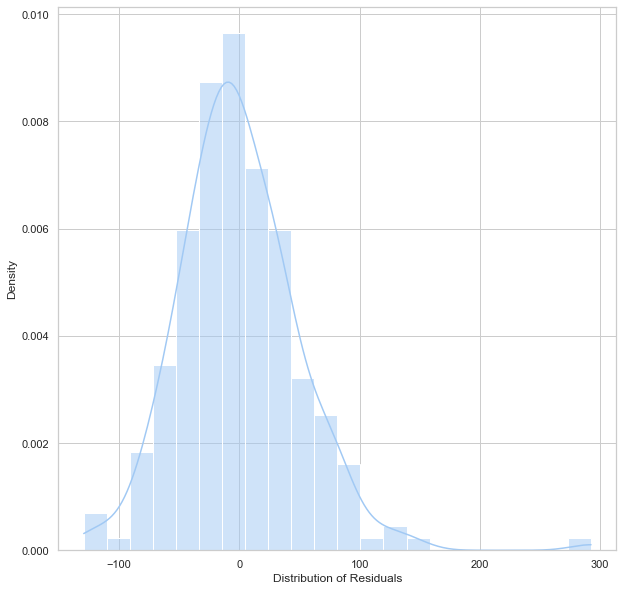

In [21]:
data = y_target - y_logits

figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

residuals = sns.histplot(data, ax=ax, kde=True, stat='density')
residuals.set(xlabel='Distribution of Residuals')

plt.show()